In [5]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [6]:
df1 = pd.read_csv('Routeviews2020.csv', header=None)
#df2 = pd.read_csv('AWS2020new_test.csv', header=None)
df1

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,0,10236,478,16797,1292,6,31,...,0,0,0,0,0,15046,5,731,328,0
1,1,0,1,0,10084,571,20022,1205,6,31,...,0,0,0,0,0,12856,5,810,324,0
2,2,0,2,0,7745,474,15587,1446,6,25,...,0,0,0,0,0,10892,8,573,331,0
3,3,0,3,0,8646,516,21180,3596,6,31,...,0,0,0,0,0,8973,1,948,334,0
4,4,0,4,0,7522,700,12731,1654,5,31,...,0,0,0,0,0,12255,3,595,329,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,2355,23,55,0,6802,351,14328,1117,6,31,...,0,0,0,0,0,7405,2,413,306,0
10076,2356,23,56,0,7720,536,44909,13242,6,31,...,0,0,0,0,0,10734,5,425,411,0
10077,2357,23,57,0,7504,328,43012,1157,6,19,...,0,0,0,0,0,9938,1,427,384,0
10078,2358,23,58,0,7889,455,19834,1163,5,31,...,0,0,0,0,0,10088,0,376,323,0


In [4]:
#df2

In [7]:
# df1 = df1.append([df2])
# df1.head()
# df1

In [18]:
# df = df1.drop(df1.columns[[0]], axis=1)
# df

In [6]:
#df2 = df1.astype(int)
#df1.to_csv('AWS.csv')

In [8]:
features = df1.loc[:, 4:40]

In [9]:
df1.iloc[:, 41].value_counts()

0    5709
1    4371
Name: 41, dtype: int64

In [10]:
X = features
#X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')

In [11]:
def targetify(s):
    if s == 0:
        return 0
    else:
        return 1

In [12]:
df1['Target']=df1.loc[:,41].apply(targetify)

In [13]:
 y = df1['Target']

In [14]:
df1["Target"].value_counts()

0    5709
1    4371
Name: Target, dtype: int64

In [15]:
X = X.fillna(0)

In [16]:
X = X.apply(pd.to_numeric, errors='coerce')

In [17]:
X = X.fillna(0)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(8064, 37) (8064,)
(2016, 37) (2016,)


In [19]:
y_train.value_counts()

0    4592
1    3472
Name: Target, dtype: int64

In [20]:
y_test.value_counts()

0    1117
1     899
Name: Target, dtype: int64

In [21]:
X_train.head()

,4,5,6,7,8,9,10,11,12,13,...,31,32,33,34,35,36,37,38,39,40
3372,6703,419,12151,1191,6,31,6,78760,529831,3668,...,0,0,0,0,0,0,9477,5,339,333
5344,7761,443,14763,929,5,25,6,54624,462135,3645,...,0,0,0,0,0,0,11347,15,465,324
3879,7777,602,15525,1464,6,31,6,60587,564627,5424,...,0,0,0,0,0,0,8784,3,400,314
2808,6985,601,12442,1148,6,31,6,98139,575963,7418,...,0,0,0,0,0,0,8756,3,464,323
7083,10039,661,19456,1455,6,18,6,104113,791323,7766,...,0,0,0,0,0,0,11182,1,397,310


In [22]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=2)

In [23]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [24]:
importances = forest.feature_importances_

In [25]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [26]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 7: 11 (0.118722)
2. feature 35: 39 (0.073954)
3. feature 1: 5 (0.072477)
4. feature 36: 40 (0.070531)
5. feature 3: 7 (0.070383)
6. feature 8: 12 (0.070272)
7. feature 33: 37 (0.070250)
8. feature 34: 38 (0.069990)
9. feature 11: 15 (0.069306)
10. feature 2: 6 (0.069031)
11. feature 0: 4 (0.068322)
12. feature 9: 13 (0.067813)
13. feature 5: 9 (0.025518)
14. feature 10: 14 (0.024943)
15. feature 12: 16 (0.020159)
16. feature 4: 8 (0.016719)
17. feature 6: 10 (0.013647)
18. feature 22: 26 (0.001597)
19. feature 21: 25 (0.001556)
20. feature 20: 24 (0.001450)
21. feature 19: 23 (0.001181)
22. feature 31: 35 (0.000516)
23. feature 17: 21 (0.000477)
24. feature 32: 36 (0.000435)
25. feature 18: 22 (0.000425)
26. feature 16: 20 (0.000172)
27. feature 30: 34 (0.000154)
28. feature 27: 31 (0.000000)
29. feature 24: 28 (0.000000)
30. feature 13: 17 (0.000000)
31. feature 28: 32 (0.000000)
32. feature 29: 33 (0.000000)
33. feature 14: 18 (0.000000)
34. feature 15: 19

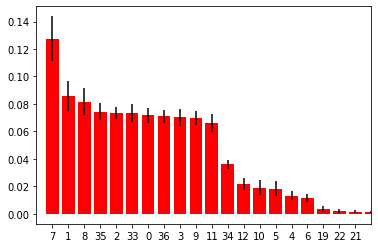

In [38]:
# Plot the top x feature importances of the forest
top_x = 20

plt.figure()
# plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()

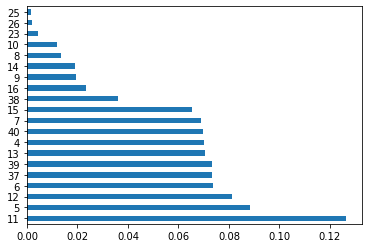

In [27]:
plt = pd.Series(forest.feature_importances_, index=X_train.columns).nlargest(top_x).plot(kind='barh')
fig = plt.get_figure()
fig.savefig('figure.jpg', bbox_inches = "tight")

In [28]:
df1.to_csv('AWS2020_new.csv')

In [29]:
df = pd.read_csv('AWS2020_new.csv', header=None)

In [30]:
df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,Target
1,0.0,0.0,0.0,0.0,0.0,2899.0,151.0,4292.0,250.0,5.0,...,0.0,0.0,0.0,0.0,4935.0,0.0,1352.0,350.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,3263.0,192.0,6547.0,509.0,5.0,...,0.0,0.0,0.0,0.0,4226.0,1.0,1297.0,347.0,0.0,0
3,2.0,2.0,0.0,2.0,0.0,2769.0,187.0,5772.0,728.0,5.0,...,0.0,0.0,0.0,0.0,4050.0,0.0,1199.0,355.0,0.0,0
4,3.0,3.0,0.0,3.0,0.0,2840.0,165.0,6784.0,968.0,5.0,...,0.0,0.0,0.0,0.0,2663.0,0.0,799.0,346.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,5045.0,2355.0,23.0,55.0,0.0,1811.0,126.0,3206.0,316.0,5.0,...,0.0,0.0,0.0,0.0,1799.0,0.0,502.0,332.0,0.0,0
10077,5046.0,2356.0,23.0,56.0,0.0,1946.0,207.0,15986.0,5960.0,5.0,...,0.0,0.0,0.0,0.0,2903.0,0.0,772.0,473.0,0.0,0
10078,5047.0,2357.0,23.0,57.0,0.0,1981.0,186.0,16535.0,418.0,5.0,...,0.0,1.0,0.0,0.0,3232.0,0.0,957.0,428.0,0.0,0
10079,5048.0,2358.0,23.0,58.0,0.0,2006.0,163.0,4045.0,323.0,5.0,...,0.0,0.0,0.0,0.0,2067.0,0.0,540.0,333.0,0.0,0
